<a id="top"></a>
<div style="text-align: center; background: #FFEB3B; font-family: 'Montserrat', sans-serif; color: #2C6B0C; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    🕋 In the Name of Allah, the Most Beneficent, the Most Merciful 🕋
</div>


<a id="top"></a>
<div style="text-align: center; background: #4CAF50; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    📄 Task 2:
    Gender Identification from Text: Binary Classification 📄
</div>

<div style="font-family: 'Montserrat', sans-serif; margin: 20px; padding: 15px; background: #f0f0f0; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <ol style="font-size: 18px; line-height: 1.6;">
        <li><strong>📚 Import Libraries:</strong> Import all necessary libraries and modules.</li>
        <li><strong>🔄 Download Stopwords:</strong> Ensure the NLTK stopwords are downloaded.</li>
        <li><strong>🔠 Set Stopwords:</strong> Define the stopwords for English.</li>
        <li><strong>🧹 Clean Text Function:</strong> Define a function to clean the input text by removing non-alphabetical characters, converting to lowercase, and removing stopwords.</li>
        <li><strong>📂 Load Dataset:</strong> Load the gender identification dataset from a CSV file.</li>
        <li><strong>🎯 Select Samples:</strong> Randomly select 50 male and 50 female samples.</li>
        <li><strong>🧼 Preprocess Data:</strong> Apply the <code>clean_text</code> function to the text data.</li>
        <li><strong>🔀 Split Data:</strong> Split the data into features (X) and labels (y), and then into training and testing sets.</li>
        <li><strong>🔧 Initialize TfidfVectorizer:</strong> Initialize and fit the TfidfVectorizer on the training data.</li>
        <li><strong>🔄 Transform Data:</strong> Transform both training and testing data using the fitted TfidfVectorizer.</li>
        <li><strong>🤖 Train Model:</strong> Train a MultinomialNB model on the transformed training data.</li>
        <li><strong>💾 Save Model and Vectorizer:</strong> Save the trained model and vectorizer using <code>joblib</code>.</li>
        <li><strong>📈 Evaluate Model:</strong> Predict the labels for the test data and evaluate the model's accuracy and performance using <code>accuracy_score</code> and <code>classification_report</code>.</li>
        <li><strong>📊 Confusion Matrix:</strong> Generate and display a confusion matrix using <code>seaborn</code> and <code>matplotlib</code>.</li>
    </ol>
</div>


In [1]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Ensure you have downloaded the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Set the stopwords for English
stop_words = set(stopwords.words('english'))

In [4]:
def clean_text(text):
    """
    Cleans the input text by removing non-alphabetical characters,
    converting to lowercase, and removing stopwords.
    """
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetical characters
    text = text.lower()  # Convert to lowercase
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

In [7]:
! pip install chardet



In [8]:
import pandas as pd

# Try different encodings
try:
    gender_data = pd.read_csv('gender-classifier-DFE-791531.csv', encoding='ISO-8859-1')
except UnicodeDecodeError:
    gender_data = pd.read_csv('gender-classifier-DFE-791531.csv', encoding='utf-16')


In [9]:
# Select 100 instances (50 Male, 50 Female)
male_samples = gender_data[gender_data['gender'] == 'male'].sample(50, random_state=42)
female_samples = gender_data[gender_data['gender'] == 'female'].sample(50, random_state=42)
gender_data = pd.concat([male_samples, female_samples])

In [12]:
gender_data

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
14352  815733815    False   finalized                   3     10/27/15 1:27   
11432  815730818    False   finalized                   3     10/27/15 1:42   
16143  815735648    False   finalized                   3    10/26/15 23:07   
2829   815722123    False   finalized                   3     10/27/15 0:21   
9020   815728361    False   finalized                   3    10/26/15 23:37   
...          ...      ...         ...                 ...               ...   
15083  815734560    False   finalized                   3    10/26/15 22:18   
11257  815730638    False   finalized                   3     10/27/15 0:57   
15135  815734615    False   finalized                   3     10/27/15 0:41   
390    815719617    False   finalized                   3    10/26/15 23:05   
4870   815724176    False   finalized                   3     10/27/15 1:24   

       gender  gender:confidence profile_yn  profile_yn:confidence  \
14352    male             1.0000        yes                    1.0   
11432    male             1.0000        yes                    1.0   
16143    male             1.0000        yes                    1.0   
2829     male             1.0000        yes                    1.0   
9020     male             1.0000        yes                    1.0   
...       ...                ...        ...                    ...   
15083  female             1.0000        yes                    1.0   
11257  female             0.6592        yes                    1.0   
15135  female             0.6540        yes                    1.0   
390    female             0.6786        yes                    1.0   
4870   female             0.6727        yes                    1.0   

             created  ...                                       profileimage  \
14352   6/27/12 0:44  ...  https://pbs.twimg.com/profile_images/657013071...   
11432   12/6/09 8:05  ...  https://pbs.twimg.com/profile_images/582445372...   
16143  11/24/11 1:52  ...  https://pbs.twimg.com/profile_images/656869861...   
2829   12/8/13 13:49  ...  https://pbs.twimg.com/profile_images/618791430...   
9020   2/26/14 18:23  ...  https://pbs.twimg.com/profile_images/438862459...   
...              ...  ...                                                ...   
15083  6/20/13 10:05  ...  https://pbs.twimg.com/profile_images/658387340...   
11257    2/7/13 2:00  ...  https://pbs.twimg.com/profile_images/646106013...   
15135  12/9/13 17:00  ...  https://pbs.twimg.com/profile_images/656086027...   
390    3/31/12 10:32  ...  https://pbs.twimg.com/profile_images/597538779...   
4870   2/20/09 21:06  ...  https://pbs.twimg.com/profile_images/576111774...   

       retweet_count sidebar_color  \
14352              0        FFFFFF   
11432              0        C0DEED   
16143              0             0   
2829               0        C0DEED   
9020               0        C0DEED   
...              ...           ...   
15083              0             0   
11257              0        FFFFFF   
15135              0        C0DEED   
390                0        C0DEED   
4870               0             0   

                                                    text tweet_coord  \
14352                  sun im feeling okay hope fuck day         NaN   
11432  thescreenfix recommended friend much fix sony ...         NaN   
16143  frayedjeanz said dumbthis surveythis living li...         NaN   
2829      bemanistar arent even putting machines auction         NaN   
9020   digital art selected daily inspiration httpstc...         NaN   
...                                                  ...         ...   
15083  im gonna subtweet said didnt wanna start troub...         NaN   
11257  told michael lost half stone responce get take...         NaN   
15135              nice good happy relationship one love         NaN   
390    table mates beautiful room barnstaplehotel ndj...         NaN   
4870   e

In [13]:
# Preprocess the data
gender_data['text'] = gender_data['text'].apply(clean_text)

In [14]:
gender_data

_unit_id  _golden _unit_state  _trusted_judgments _last_judgment_at  \
14352  815733815    False   finalized                   3     10/27/15 1:27   
11432  815730818    False   finalized                   3     10/27/15 1:42   
16143  815735648    False   finalized                   3    10/26/15 23:07   
2829   815722123    False   finalized                   3     10/27/15 0:21   
9020   815728361    False   finalized                   3    10/26/15 23:37   
...          ...      ...         ...                 ...               ...   
15083  815734560    False   finalized                   3    10/26/15 22:18   
11257  815730638    False   finalized                   3     10/27/15 0:57   
15135  815734615    False   finalized                   3     10/27/15 0:41   
390    815719617    False   finalized                   3    10/26/15 23:05   
4870   815724176    False   finalized                   3     10/27/15 1:24   

       gender  gender:confidence profile_yn  profile_yn:confidence  \
14352    male             1.0000        yes                    1.0   
11432    male             1.0000        yes                    1.0   
16143    male             1.0000        yes                    1.0   
2829     male             1.0000        yes                    1.0   
9020     male             1.0000        yes                    1.0   
...       ...                ...        ...                    ...   
15083  female             1.0000        yes                    1.0   
11257  female             0.6592        yes                    1.0   
15135  female             0.6540        yes                    1.0   
390    female             0.6786        yes                    1.0   
4870   female             0.6727        yes                    1.0   

             created  ...                                       profileimage  \
14352   6/27/12 0:44  ...  https://pbs.twimg.com/profile_images/657013071...   
11432   12/6/09 8:05  ...  https://pbs.twimg.com/profile_images/582445372...   
16143  11/24/11 1:52  ...  https://pbs.twimg.com/profile_images/656869861...   
2829   12/8/13 13:49  ...  https://pbs.twimg.com/profile_images/618791430...   
9020   2/26/14 18:23  ...  https://pbs.twimg.com/profile_images/438862459...   
...              ...  ...                                                ...   
15083  6/20/13 10:05  ...  https://pbs.twimg.com/profile_images/658387340...   
11257    2/7/13 2:00  ...  https://pbs.twimg.com/profile_images/646106013...   
15135  12/9/13 17:00  ...  https://pbs.twimg.com/profile_images/656086027...   
390    3/31/12 10:32  ...  https://pbs.twimg.com/profile_images/597538779...   
4870   2/20/09 21:06  ...  https://pbs.twimg.com/profile_images/576111774...   

       retweet_count sidebar_color  \
14352              0        FFFFFF   
11432              0        C0DEED   
16143              0             0   
2829               0        C0DEED   
9020               0        C0DEED   
...              ...           ...   
15083              0             0   
11257              0        FFFFFF   
15135              0        C0DEED   
390                0        C0DEED   
4870               0             0   

                                                    text tweet_coord  \
14352                  sun im feeling okay hope fuck day         NaN   
11432  thescreenfix recommended friend much fix sony ...         NaN   
16143  frayedjeanz said dumbthis surveythis living li...         NaN   
2829      bemanistar arent even putting machines auction         NaN   
9020   digital art selected daily inspiration httpstc...         NaN   
...                                                  ...         ...   
15083  im gonna subtweet said didnt wanna start troub...         NaN   
11257  told michael lost half stone responce get take...         NaN   
15135              nice good happy relationship one love         NaN   
390    table mates beautiful room barnstaplehotel ndj...         NaN   
4870   e

In [15]:
# Split the data into features (X) and labels (y)
X = gender_data['text']
y = gender_data['gender'].apply(lambda x: 1 if x == 'male' else 0)

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)
vectorizer.fit(X_train)

TfidfVectorizer(max_features=1000)

In [19]:
# Transform the training and testing data
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [20]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [21]:
# Save the model and vectorizer
joblib.dump(model, 'gender_naive_bayes_model.pkl')
joblib.dump(vectorizer, 'gender_tfidf_vectorizer.pkl')

['gender_tfidf_vectorizer.pkl']

In [22]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [23]:
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.88      0.56         8
           1       0.67      0.17      0.27        12

    accuracy                           0.45        20
   macro avg       0.54      0.52      0.41        20
weighted avg       0.56      0.45      0.38        20



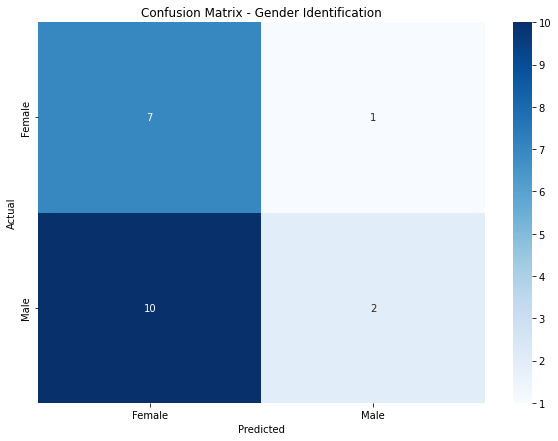

In [24]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gender Identification')
plt.show()

<a id="top"></a>
<div style="text-align: center; background: #4CAF50; font-family: 'Montserrat', sans-serif; color: white; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    😊📄 Task 3: Emotion Prediction from Text: Multiclass Classification 😢
</div>

<div style="font-family: 'Montserrat', sans-serif; margin: 20px; padding: 15px; background: #f0f0f0; border-radius: 10px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.1);">
    <ol style="font-size: 18px; line-height: 1.6;">
        <li><strong>🔄 Load the Emotion Prediction Dataset:</strong> Load the dataset containing text samples and their corresponding emotion labels from a CSV file.</li>
        <li><strong>🧹 Preprocess the Data:</strong> Apply the <code>clean_text</code> function to the 'text' column to clean the text data.</li>
        <li><strong>🔍 Split the Data into Features and Labels:</strong> Separate the text data into features (X) and the emotion labels into labels (y).</li>
        <li><strong>🔀 Split the Data into Training and Testing Sets:</strong> Divide the data into training and testing sets using <code>train_test_split</code>.</li>
        <li><strong>🔧 Initialize TfidfVectorizer:</strong> Create a <code>TfidfVectorizer</code> to convert text data into TF-IDF features and fit it on the training data.</li>
        <li><strong>🔄 Transform the Training and Testing Data:</strong> Convert the text data into TF-IDF feature vectors for both training and testing sets.</li>
        <li><strong>🤖 Train the Model:</strong> Use a <code>MultinomialNB</code> model to train on the TF-IDF features from the training data.</li>
        <li><strong>💾 Save the Model and Vectorizer:</strong> Save the trained model and vectorizer to disk using <code>joblib.dump</code>.</li>
        <li><strong>📈 Evaluate the Model:</strong> Predict the labels for the test data and evaluate the model's performance using <code>accuracy_score</code> and <code>classification_report</code>.</li>
        <li><strong>📊 Confusion Matrix:</strong> Generate and display a confusion matrix to visualize the performance of the model using <code>seaborn</code> and <code>matplotlib</code>.</li>
    </ol>
</div>


In [26]:
# Load the emotion prediction dataset
emotion_data = pd.read_csv('emotion_prediction_dataset.csv')

In [28]:
emotion_data.head()

Tweet Emotion
0             False alarm // matoma &amp; Becky hill   anger
1  I'm tired of everybody telling me to chill out...   anger
2  Im so serious about putting words in my mouth ...   anger
3  Can someone make me a priority list of which t...   anger
4  @TeaPartyOrg Hes right when the Civil war star...   anger

In [29]:
# Preprocess the data
emotion_data['Tweet'] = emotion_data['Tweet'].apply(clean_text)

In [41]:
emotion_data

Tweet Emotion
0                   false alarm matoma amp becky hill   anger
1   im tired everybody telling chill everythings o...   anger
2   im serious putting words mouth bitch dont add ...   anger
3   someone make priority list things outraged ord...   anger
4   teapartyorg hes right civil war starts wall wa...   anger
..                                                ...     ...
95   riggs dumb ass hell lolol hilarious lethalweapon   trust
96                            american schools lively   trust
97        accept challenges feel exhilaration victory   trust
98  ever stayed hostels overseas frame reference m...   trust
99  prosyndicate thanks replying im ironing shirt ...   trust

[100 rows x 2 columns]

In [31]:
# Split the data into features and labels
X = emotion_data['Tweet']
y = emotion_data['Emotion']  

In [32]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [33]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=10)
vectorizer.fit(X_train)


TfidfVectorizer(max_features=10)

In [34]:
# Transform the training and testing data
X_train_tfidf = vectorizer.transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [35]:
X_train_tfidf

<80x10 sparse matrix of type '<class 'numpy.float64'>'
	with 42 stored elements in Compressed Sparse Row format>

In [36]:
# Train the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [37]:
# Save the model and vectorizer
joblib.dump(model, 'emotion_naive_bayes_model.pkl')
joblib.dump(vectorizer, 'emotion_tfidf_vectorizer.pkl')

['emotion_tfidf_vectorizer.pkl']

In [39]:
# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)


Accuracy: 0.15
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
anticipation       0.00      0.00      0.00         2
     disgust       0.00      0.00      0.00         2
        fear       0.17      0.67      0.27         3
         joy       0.00      0.00      0.00         3
        love       0.25      1.00      0.40         1
   pessimism       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         4
    surprise       0.00      0.00      0.00         1

    accuracy                           0.15        20
   macro avg       0.05      0.19      0.07        20
weighted avg       0.04      0.15      0.06        20



C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


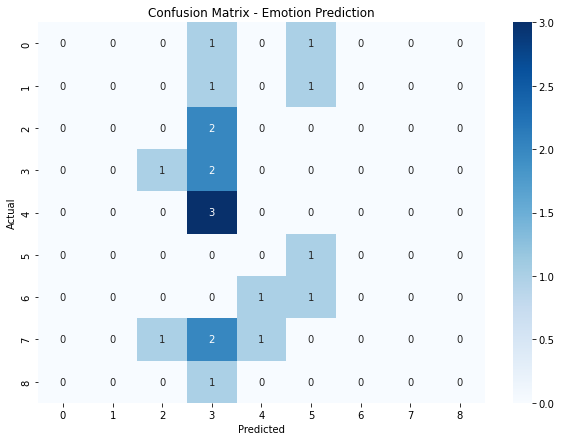

In [40]:

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Emotion Prediction')
plt.show()


<a id="top"></a>
<div style="text-align: center; background: #FFFB3C; font-family: 'Montserrat', sans-serif; color: #2B7B0C; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    🌟 Testing 🌟
</div>


In [44]:
import joblib
import string
import re

# Load the saved model and vectorizer
model = joblib.load('emotion_naive_bayes_model.pkl')
vectorizer = joblib.load('emotion_tfidf_vectorizer.pkl')

def clean_text(text):
    """Function to clean the input text."""
    # Convert text to lowercase
    text = text.lower()
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove extra whitespace
    text = ' '.join(text.split())
    
    # Remove any remaining non-alphabetical characters (optional)
    text = re.sub(r'[^a-z\s]', '', text)
    
    return text

# Function to predict emotion for a given text input
def predict_emotion(text):
    cleaned_text = clean_text(text)
    text_tfidf = vectorizer.transform([cleaned_text])
    prediction = model.predict(text_tfidf)
    return prediction[0]

# Main function to get user input and predict emotion
if __name__ == "__main__":
    print("="*50)
    print("✨ Emotion Prediction System ✨")
    print("="*50)
    
    # Get input text from the user
    input_text = input("Enter a sentence to predict the emotion: ")
    
    # Predict emotion
    emotion = predict_emotion(input_text)
    
    print("\n" + "="*50)
    print(f"📝 Input Text: \n{input_text}")
    print(f"😊 Predicted Emotion: \n{emotion}")
    print("="*50)


✨ Emotion Prediction System ✨
Enter a sentence to predict the emotion: I am feeling really happy today!

📝 Input Text: 
I am feeling really happy today!
😊 Predicted Emotion: 
fear


<a id="top"></a>
<div style="text-align: center; background: #FFEB3B; font-family: 'Montserrat', sans-serif; color: #2C6B0C; padding: 15px; font-size: 30px; font-weight: bold; line-height: 1; border-radius: 20px 20px 0 0; margin-bottom: 20px; box-shadow: 0px 4px 6px rgba(0, 0, 0, 0.2);">
    🌟 Jazak Allah Khair 🌟
</div>
